# Hist 3368 Week 4 - Using Wordnet to Study Congress

The notebook below generates some visualizations of a controlled vocabulary of crime, applying the findings from Wordnet to Jane Austen and Congress.

In [1]:
import nltk, numpy, re, matplotlib
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt

### Load some data

In [2]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [3]:
with open('senseandsensibility.txt', 'r') as myfile:
    sas_data = myfile.read().split('\n\n"I suppose you know, ma\'am, that Mr. Ferrars is married"\n\nIt _was_ Edward\n\n"Everything in such respectable condition"\n\n ')[1].split('THE END')[0].strip()
with open('emma.txt', 'r') as myfile:
    emma_data = myfile.read().split('CHAPTER I')[1].split('FINIS')[0].strip()
with open('prideandprejudice.txt', 'r') as myfile:
    pap_data = myfile.read().split('CHAPTER I')[1].split('End of the Project Gutenberg EBook of Pride and Prejudice, by Jane Austen')[0].strip()
data = [sas_data, emma_data, pap_data]

# clean up
austenwords = []
for novel in data:
    novel = re.sub('[\",.;:?([)\]_*]', '', novel) # strip punctuation
    novel = re.sub('-', ' ', novel) # replace hyphens with spaces
    novelwords = novel.replace('\n', ' ').lower().split() # remove whitespace, lowercase, split into words
    austenwords += novelwords

In [4]:
cd ~/digital-history 

/users/jguldi/digital-history


This may take a minute.

In [5]:
congress = pd.read_csv("congress1967-2010.csv")

In [6]:
congress1 = congress[congress['year'] == 1967]
congress2 = congress[congress['year'] == 2010]

This may take a minute.

In [7]:
# clean up speeches
congressspeeches1 = []
for speech in congress1['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower()
    congressspeeches1.append(speech)
congressspeeches1 = ' '.join(congressspeeches1)

congressspeeches2 = []
for speech in congress2['speech']:
    speech = re.sub('[\",.;:?([)\]_*]', '', speech) # strip punctuation
    speech = re.sub('-', ' ', speech) # replace hyphens with spaces
    speech = speech.lower()
    congressspeeches2.append(speech)
congressspeeches2 = ' '.join(congressspeeches2)

congresswords1 = congressspeeches1.split() # remove whitespace, lowercase, split into words    
print(congresswords1[:10])

congresswords2 = congressspeeches2.split() # remove whitespace, lowercase, split into words    
print(congresswords2[:10])

['those', 'who', 'do', 'not', 'enjoy', 'the', 'privilege', 'of', 'the', 'floor']
['the', 'clerk', 'will', 'please', 'read', 'a', 'communication', 'to', 'the', 'senate']


### Load the Controlled vocabulary on crime that we generated earlier this week.

In [8]:
cd ~/digital-history

/users/jguldi/digital-history


In [9]:
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

### Find Vocab Matches in Jane Austen

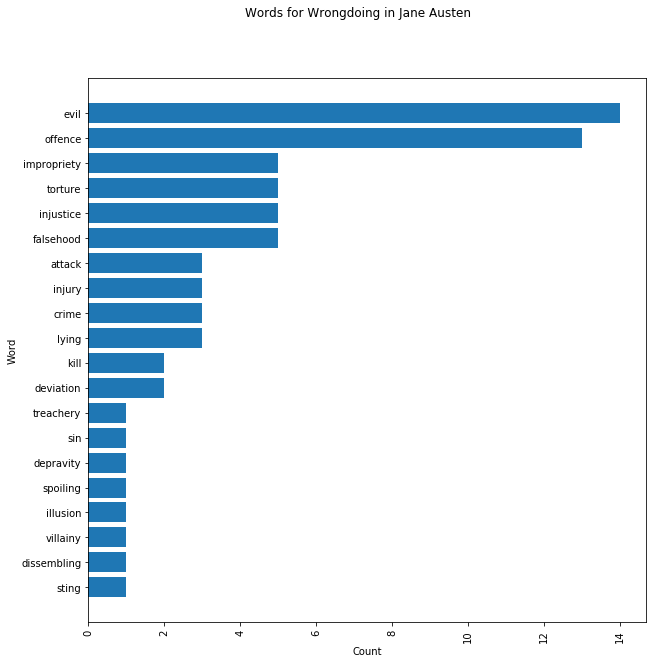

In [10]:
# search for matched words
matchedwords = []
for w in austenwords:
    for v in vocab: 
        if w == v: # notice what I changed in this line
            matchedwords.append(v)
matchedwords
pd.Series.value_counts(matchedwords)

# search for matched bigrams
from textblob import TextBlob
bigrams = TextBlob(data[0]).ngrams(n=2)
austenbigramlist = [] # create an empty list which we will fill in with the following loop:
for bigram in bigrams: # move through each line of the *bigrams* list
    bigram2 = bigram[0] + ' ' + bigram[1] # call the first word, a space, and the second word into a new string
    austenbigramlist.append(bigram2) # save the string 

cleanwordnetbigrams = []
for v in vocab:
    if " " in vocab:
        cleanwordnetbigrams.append(vocab)

matchedbigrams = []
for w in austenbigramlist:
    for v in cleanwordnetbigrams: 
        if w == v: # notice what I changed in this line
            matchedbigrams.append(v)
pd.Series.value_counts(matchedbigrams)

# put it all together and stopword out ambiguous words
ambiguouswords = ['off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid', 'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical', 'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist = []
allcontrolledvocab = matchedwords + matchedbigrams  
for v in allcontrolledvocab:
    if v not in ambiguouswords:
        finallist.append(v)
finalcount = pd.Series.value_counts(finallist)

#######
# a well-labeled barplot
plt.figure(figsize = (10, 10)) # make it wide and squat
plt.barh(finalcount.index, finalcount) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Jane Austen') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('austen-wrongdoing.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

### Find Vocab Matches in Congress

Congress is bigger, so we have to use slightly more efficient code.  The lines below do the same as those above, but we use 'list comprehension' grammar:
    
    word for word in list1 if word in list2

This is the equivalent of a for loop:

    for word in list1:
        if word in list2:
            word


First, fine the controlled vocab match in words and bigrams for 1967 and plot the top instances.

**This may take a while. Go get lunch!**

In [11]:
# search for matched words
setvocab = set(vocab)
matchedwords1 = [word for word in congresswords1 if word in setvocab]

# search for matched bigrams
from textblob import TextBlob
bigrams = TextBlob(congressspeeches1).ngrams(n=2)
congressbigramlist1 = [] # create an empty list which we will fill in with the following loop:
for bigram in bigrams: # move through each line of the *bigrams* list
    bigram2 = ' '.join(bigram) # call the first word, a space, and the second word into a new string
    congressbigramlist1.append(bigram2) # save the string 

# search for matched bigrams
matchedbigrams1 = [bigram for bigram in congressbigramlist1 if bigram in setvocab]

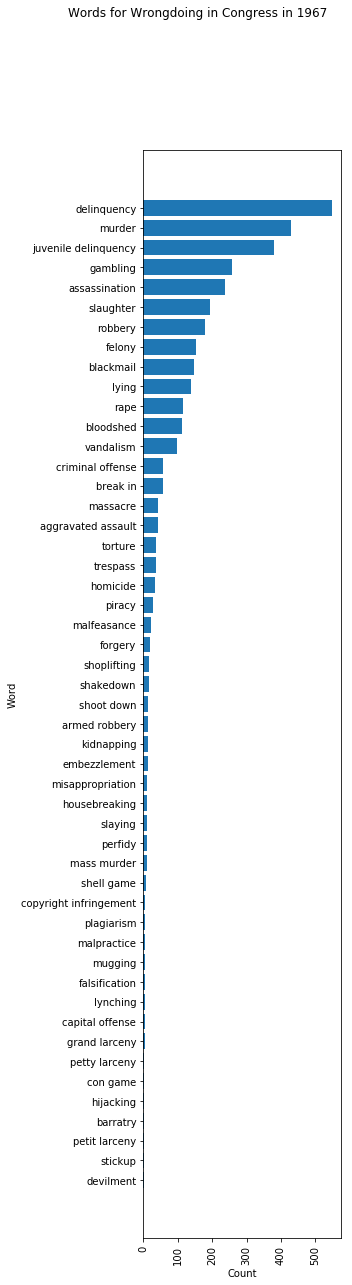

In [22]:
# put it all together and stopword out ambiguous words
allcontrolledvocab1 = matchedwords1 + matchedbigrams1
ambiguouswords = ['infringement', 'setup', 'mischief', 'foul', 'illusion','encroachment', 'misdemeanor','unfairness', 'pretense','sophistication', 'deceit',
                  'disservice','fabrication', 'equivocation','falsehood','usurpation','violation', 'injury', 'injustice', 'carnage', 'betrayal','evil', 
                  'hell', 'offense','deviation', 'impropriety','indirection','pretending','duplicity', 'delusion','trickery','shrinkage','transgression',
                  'spoiling', 'indecency','depravity','sin','slay','butchery','molestation','mortal sin','guile','abomination','malicious mischief',
                  'treason','treachery','inroad','offence','foul play','perpetration','wile','iniquity','committal','brutalization','infliction','falsify','hooliganism','impersonation',
                    'sinning','fakery', 'hustle', 'mangle','intemperance', 'foul ball','fratricide','monkey business','terrorization','pilferage','gyp',
                  'pyramiding','obscenity','holdup', 'wickedness','nonfeasance','abnormality','law breaking','mutilate','caper','ill turn','frame up',
                  'prevarication','thuggery','immorality','perversion','rascality','quackery','double dealing','con','fraud','shenanigan','roguery','high treason',
                  'cheating','off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid','misfeasance',
                  'attack','assault','sting','indiscretion','vice','crime','snatch','infraction','misapplication','kill','irregularity','flimflam','chicanery',
                  'sellout','twisting','blaze','straining','misbehavior','warp','spoilage','tort','simulation','turpitude','dereliction','mayhem', 'dishonesty',
                  'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical',
                  'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 
                  'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']
finallist1 = [w for w in allcontrolledvocab1 if w not in ambiguouswords]
finalcount1 = pd.Series.value_counts(finallist1)[:50]

#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.barh(finalcount1.index, finalcount1) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 1967') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-1967.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

Do the same thing for 2010.

In [18]:
# search for matched words
setvocab = set(vocab)
matchedwords2 = [word for word in congresswords2 if word in setvocab]

# search for matched bigrams
from textblob import TextBlob
bigrams = TextBlob(congressspeeches2).ngrams(n=2)
congressbigramlist2 = [] # create an empty list which we will fill in with the following loop:
for bigram in bigrams: # move through each line of the *bigrams* list
    bigram2 = ' '.join(bigram) # call the first word, a space, and the second word into a new string
    congressbigramlist2.append(bigram2) # save the string 

# search for matched bigrams
matchedbigrams2 = [bigram for bigram in congressbigramlist2 if bigram in setvocab]

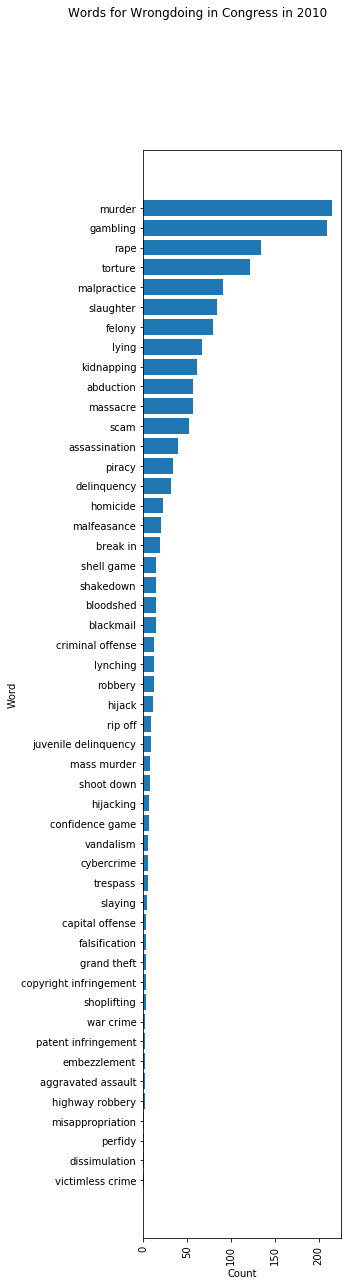

In [23]:
# put it all together and stopword out ambiguous words
allcontrolledvocab2 = matchedwords2 + matchedbigrams2
finallist2 = [w for w in allcontrolledvocab2 if w not in ambiguouswords]
finalcount2 = pd.Series.value_counts(finallist2)[:50]

#######
# a well-labeled barplot
plt.figure(figsize = (5, 20)) # make it tall and thin
plt.barh(finalcount2.index, finalcount2) # tell the barplot what to put on the x and y axes. This time we're using 'barh' for a horizontal bar plot.
plt.gcf().subplots_adjust(left=0.35) # pad the left margin so that the labels don't get cut off
plt.xticks(rotation=90) # this tells Python to 'rotate' the labels on the x axis so that the words fit on the screen
plt.ylabel('Word') # label
plt.xlabel('Count') # label
plt.suptitle('Words for Wrongdoing in Congress in 2010') #This line labels the title
plt.gca().invert_yaxis() # reverse the order of the y axis
plt.savefig('congress-wrongdoing-2010.png', dpi = 300) # save the figure in your folder
plt.show() # display the figure below

## Assignment

1) What kinds of crimes concern Austen?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

2) Compare and contrast wrongdoing in Jane Austen and wrongdoing in Congress.  Why were a novelist from 1800 and lawmakers after 1967 concerned with different offenses?

3) What kinds of crimes concerned Congress in 1967?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

4) What kinds of crimes concerned Congress in 2010?  Be specific. Write about as many words as possible. Embed the visualization in a Word Document. 

5) Compare and contrast wrongdoing in Congress in 1980 with wrongdoing in Congress in 1989. Be specific. Write about as many words as possible. What might explain this historical change of focus?
